
The world_population.csv file contains population density data from 1960 to 2016, where population density is measured as the number of people per square kilometer. It's important to note that this metric accounts for density rather than absolute population, resulting in some small countries having high densities. Due to missing data for certain years, likely due to countries not existing or data gaps, we'll calculate the mean population density for each country instead of summing them up.

1. Getting data into shape.

To wrangle the data for this exploration, first, we transpose the DataFrame so that each row contains the data for a particular year and each column contains the data for a country. Next, we drop the initial rows containing descriptive data such as 'Country Code', 'Indicator Name', and 'Indicator Code'.


In [33]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1.Read the dataset from a CSV file into a pandas DataFrame
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/world_population.csv', index_col = 0)

data = data.transpose()
selected = ['Country Code', 'Indicator Name', 'Indicator Code']
data = data.drop(selected, axis = 0)
print(data.head())
print(data.sum())

# Convert the index to date object
data.index = pd.to_datetime(data.index)


Country Name       Aruba    Andorra Afghanistan    Angola    Albania  \
1960                 NaN        NaN         NaN       NaN        NaN   
1961          307.972222  30.587234   14.038148  4.305195  60.576642   
1962          312.366667  32.714894   14.312061  4.384299  62.456898   
1963          314.983333  34.914894   14.599692  4.464433  64.329234   
1964          316.827778  37.170213   14.901579  4.544558  66.209307   

Country Name Arab World United Arab Emirates Argentina    Armenia  \
1960                NaN                  NaN       NaN        NaN   
1961           6.978698             1.207955  7.656358   67.93955   
1962           7.171974             1.342584  7.778624  70.325606   
1963           7.372223             1.497799  7.900729  72.723112   
1964           7.579523             1.653349  8.022073  75.101264   

Country Name American Samoa  ...     Vietnam   Vanuatu West Bank and Gaza  \
1960                    NaN  ...         NaN       NaN                NaN  

There are 264 countries listed.

2. Create a bar chart showing the mean population density for all countries (although this will produce too
much information to make sense of).

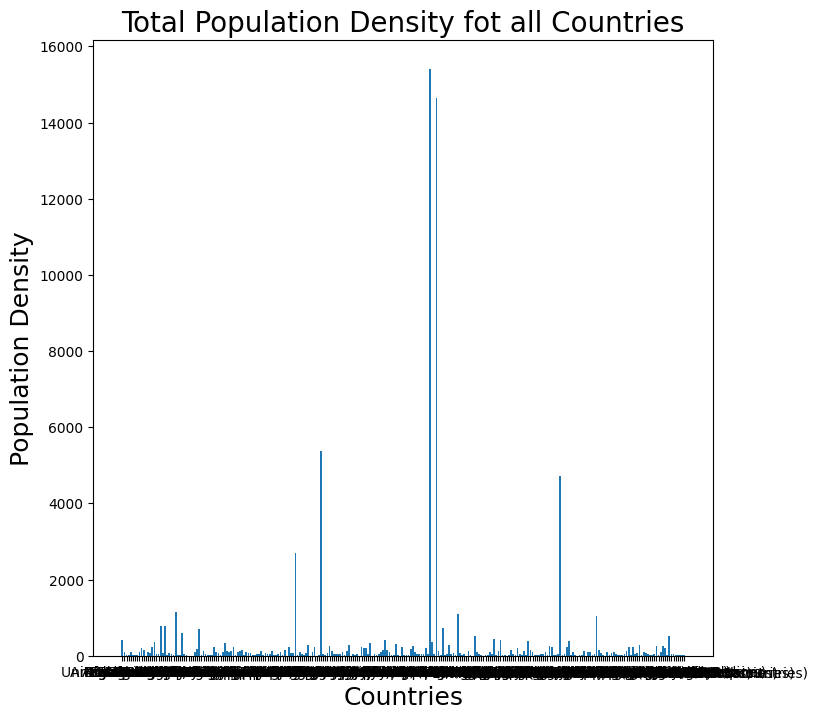

In [34]:
plt.figure(figsize=(8, 8))
x_pos = np.arange(len(data.columns))
plt.bar(x_pos, data.mean(), align = 'center')
plt.xticks(x_pos, data.columns)
plt.xlabel('Countries', fontsize=18)
plt.ylabel('Population Density', fontsize=18)
plt.title('Total Population Density fot all Countries', fontsize=20)
plt.show()

3. Automatically classifying countries into extreme, high, moderate, and low density.

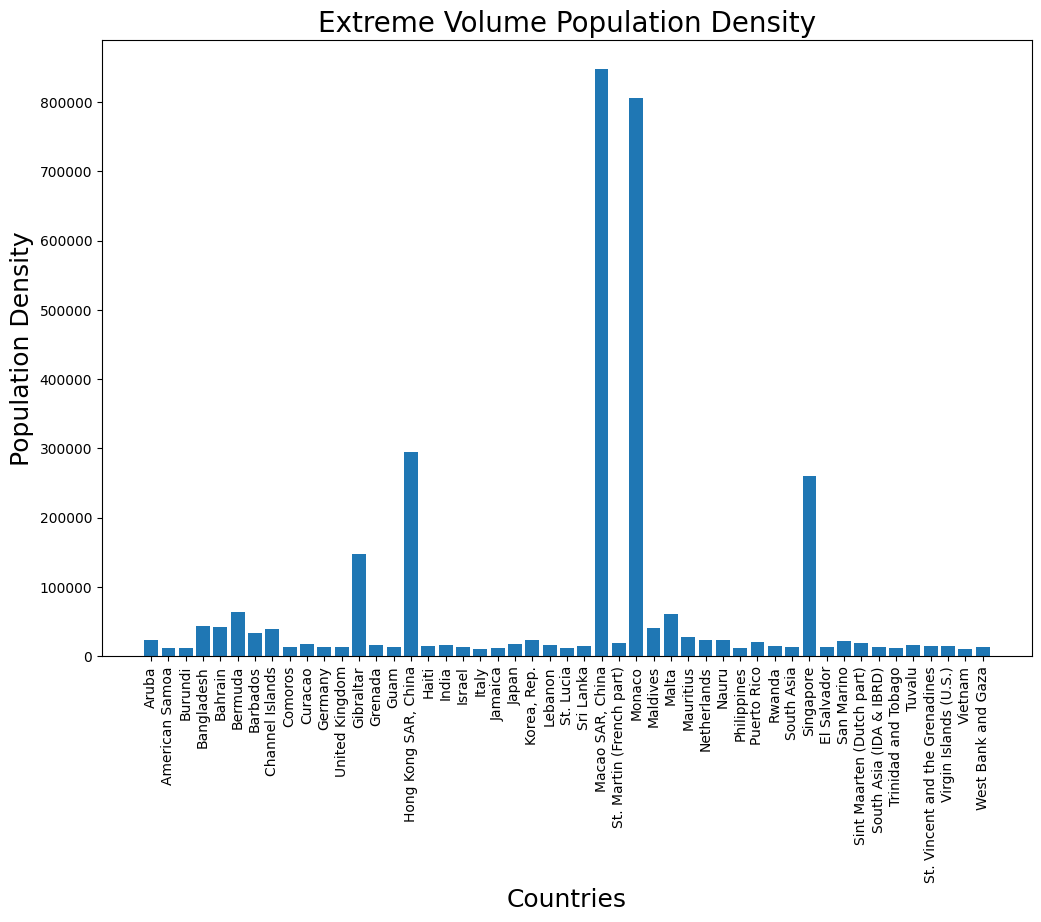

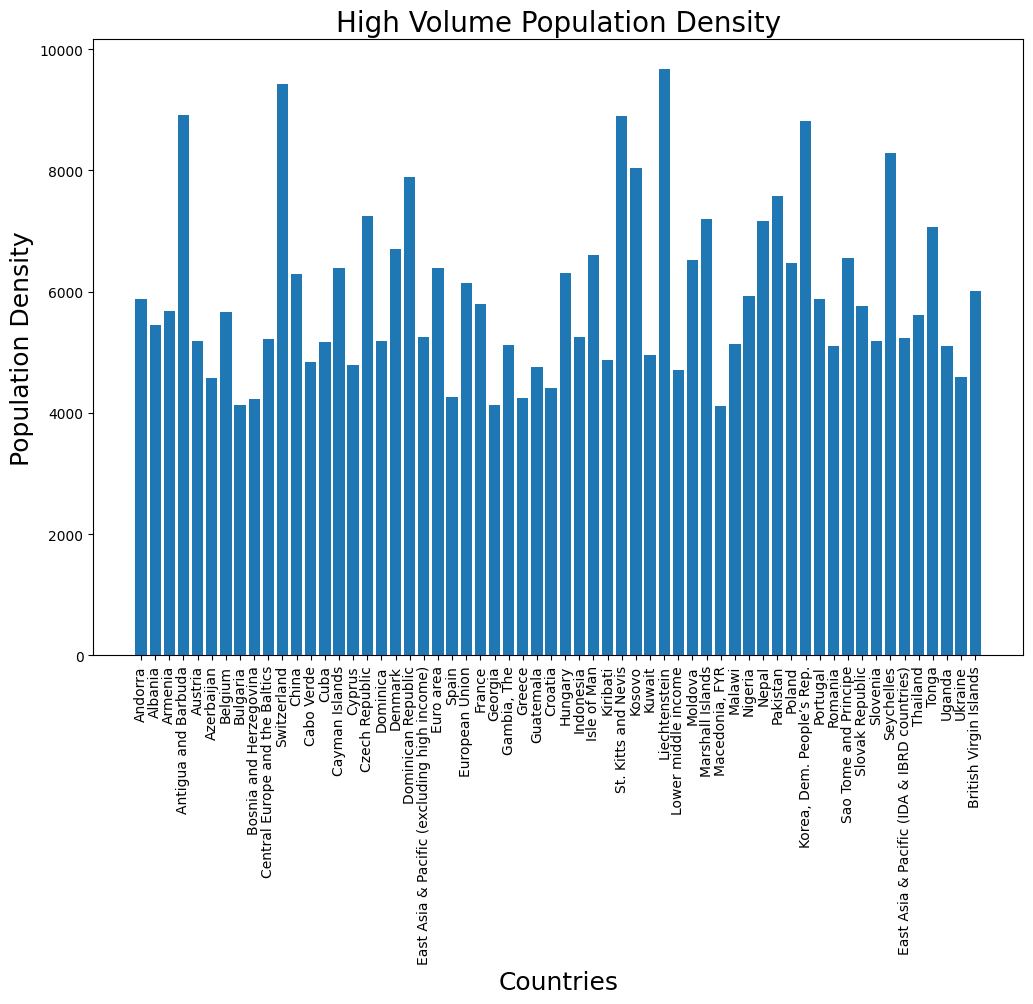

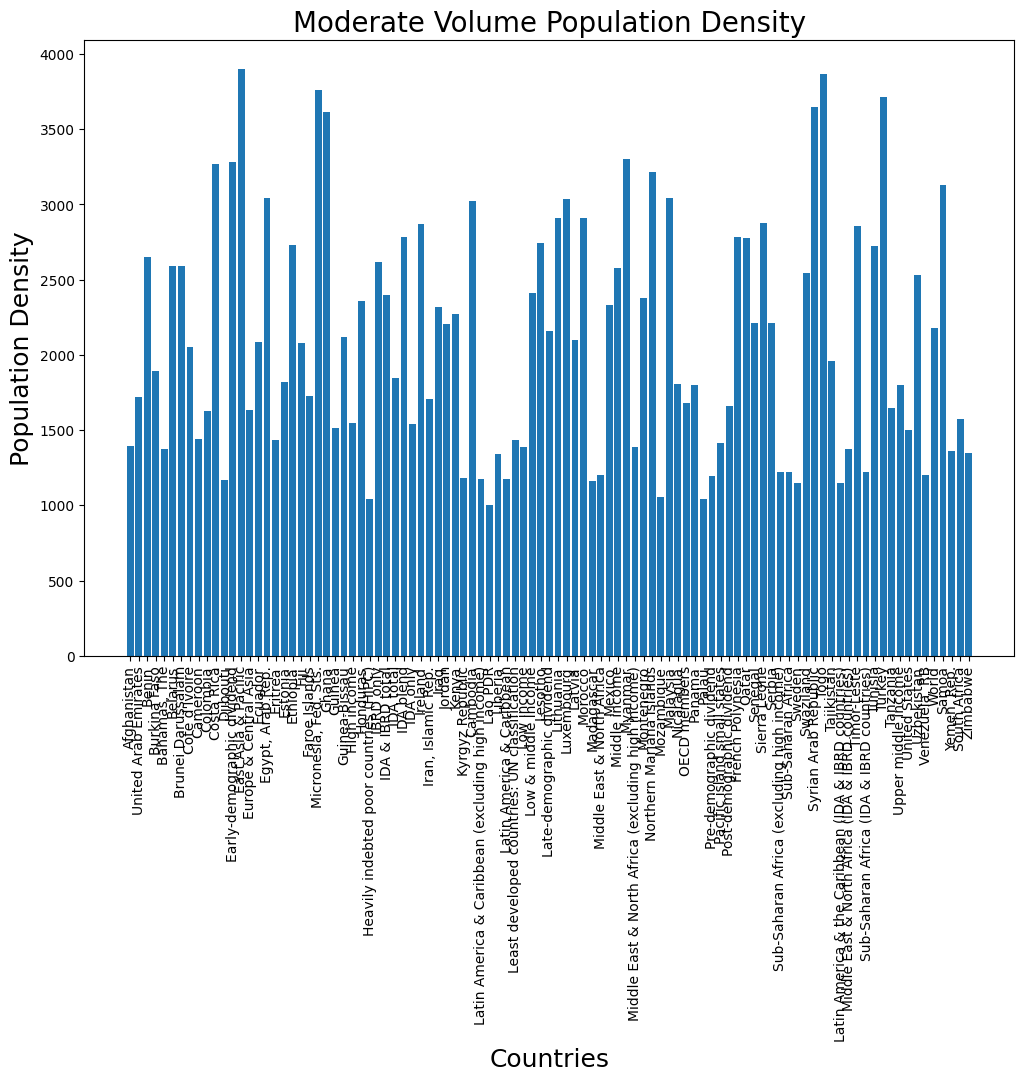

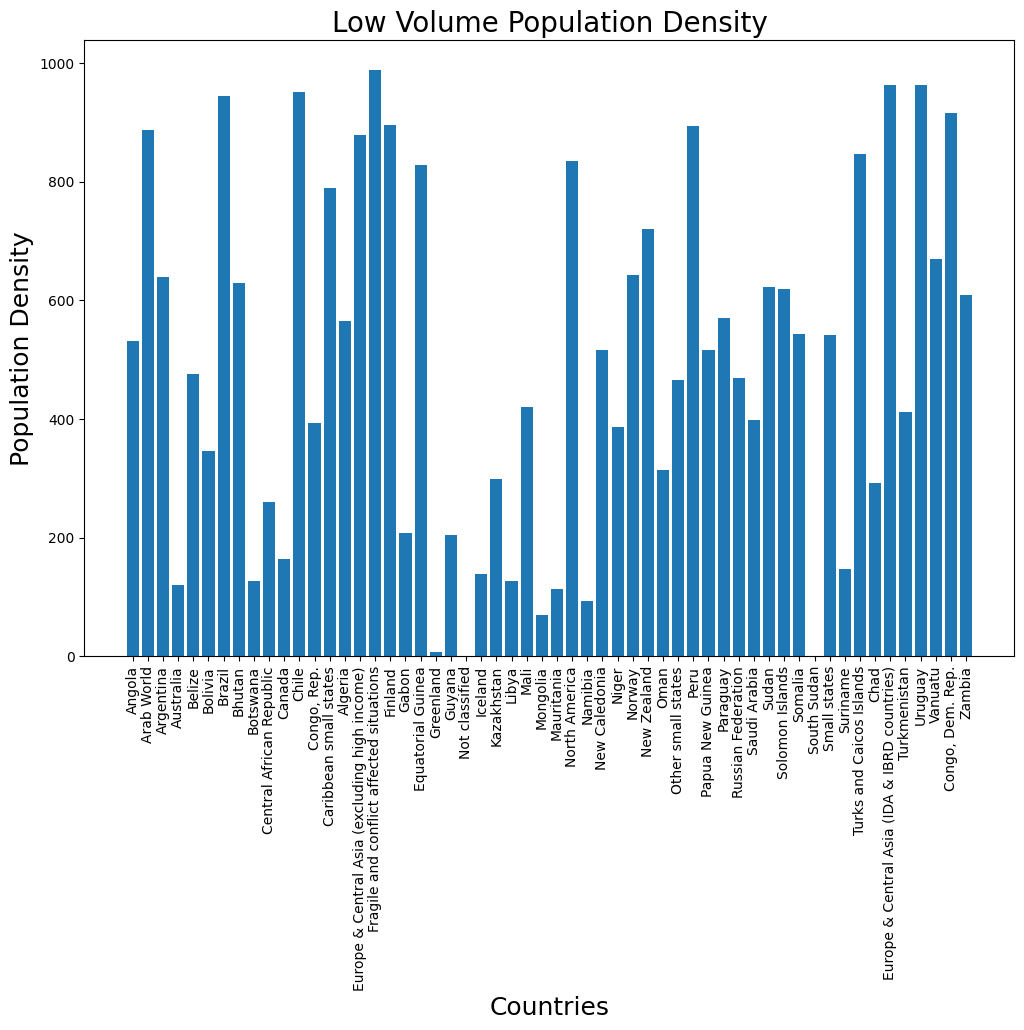

In [35]:
categories = ['Extreme', 'High', 'Moderate', 'Low']
categories_selected = [[] for i in range(len(categories))]
for name in data.columns:
  total_sales = data[name].sum()
  if total_sales >10000:
    category = 0
  elif total_sales >4000:
    category = 1
  elif total_sales >1000:
    category = 2
  else:
    category = 3
  categories_selected[category]. append(name)


for i, selected in enumerate(categories_selected):
  plt.figure(figsize=(12,8))
  x_pos = np.arange(len(data[selected].columns))
  plt.bar(x_pos, data[selected].sum(), align = 'center')
  plt.xticks(x_pos, data[selected].columns, rotation='vertical')
  plt.xlabel('Countries', fontsize = 18)
  plt.ylabel('Population Density', fontsize=18)
  plt.title(categories[i]+' Volume Population Density', fontsize = 20)
  plt.show

4. The data is still rather difficult to deal with, so let's pick five countries and create a bar chart
showing the mean population density for these countries.

Country Name United Kingdom Korea, Rep.      Spain United Arab Emirates  \
1960-01-01              NaN         NaN        NaN                  NaN   
1961-01-01       218.244947  267.112513  61.505562             1.207955   
1962-01-01       220.104989  274.860357  62.074045             1.342584   
1963-01-01        221.75836  282.622299  62.620855             1.497799   
1964-01-01       223.205059  290.111497  63.246218             1.653349   

Country Name Kazakhstan  
1960-01-01          NaN  
1961-01-01     3.752217  
1962-01-01     3.901197  
1963-01-01     4.042505  
1964-01-01     4.173549  


<function matplotlib.pyplot.show(close=None, block=None)>

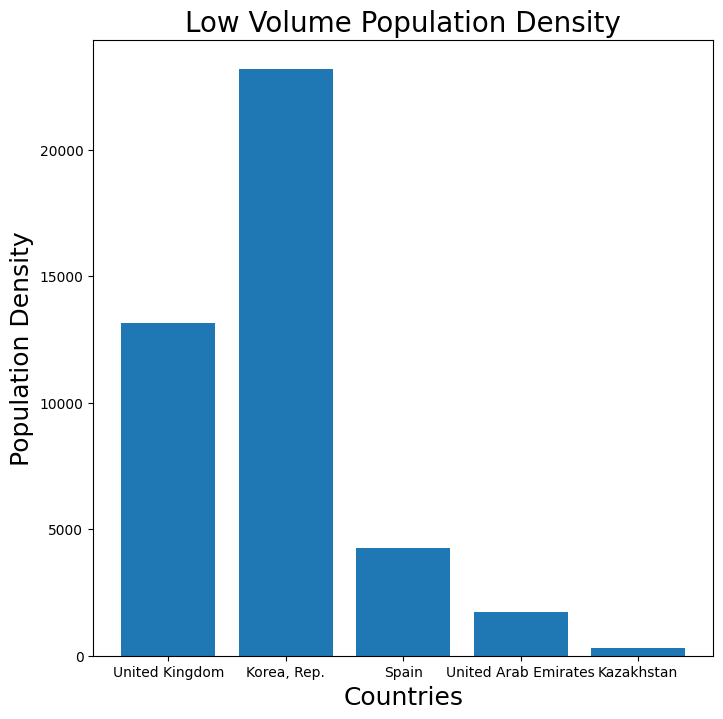

In [36]:
selected = ['United Kingdom', 'Korea, Rep.', 'Spain', 'United Arab Emirates', 'Kazakhstan']
print(data[selected].head())

plt.figure(figsize=(8, 8))
x_pos = np.arange(len(data[selected].columns))
plt.bar(x_pos, data[selected].sum(), align='center')
plt.xticks(x_pos, data[selected].columns)
plt.xlabel('Countries', fontsize = 18)
plt.ylabel('Population Density', fontsize=18)
plt.title(categories[i]+' Volume Population Density', fontsize = 20)
plt.show

5. Now let's create a bar chart showing the mean population density for the above selected countries for the years 1961-
1970, inclusive.

Country Name United Kingdom Korea, Rep.      Spain United Arab Emirates  \
1961             218.244947  267.112513  61.505562             1.207955   
1962             220.104989  274.860357  62.074045             1.342584   
1963              221.75836  282.622299  62.620855             1.497799   
1964             223.205059  290.111497  63.246218             1.653349   
1965             224.643699  297.581111  63.936716             1.798062   
1966             225.885587  305.158314   64.59481             1.926758   
1967             227.105361  312.367645  65.394668             2.054797   
1968             228.213533  319.700415   66.25542             2.216651   
1969             229.164428  327.019137  66.911549             2.458971   
1970             230.079982  334.240379  67.658832             2.816196   

Country Name Kazakhstan  
1961           3.752217  
1962           3.901197  
1963           4.042505  
1964           4.173549  
1965           4.292651  
1966           4.3

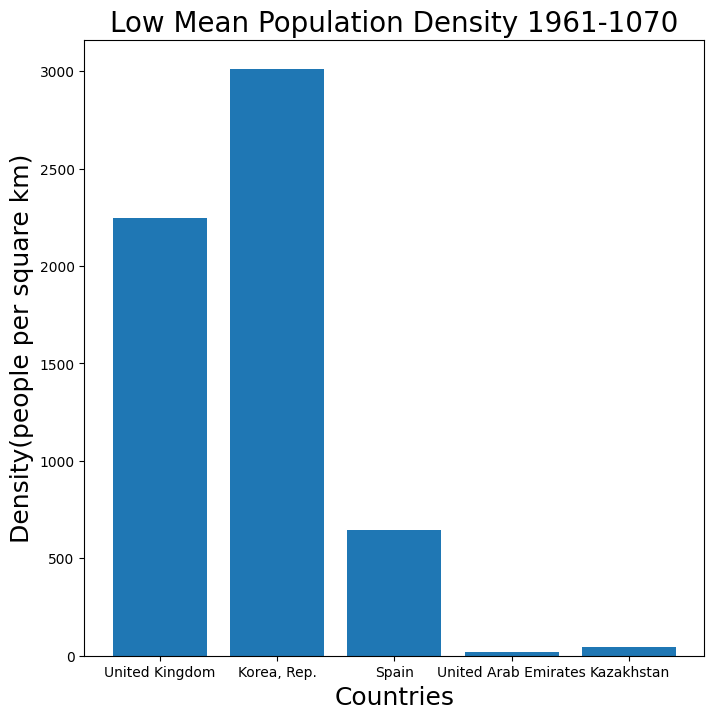

In [37]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1.Read the dataset from a CSV file into a pandas DataFrame
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/world_population.csv', index_col = 0)

data = data.transpose()
selected = ['Country Code', 'Indicator Name', 'Indicator Code']
data = data.drop(selected, axis = 0)

selected = ['United Kingdom', 'Korea, Rep.', 'Spain', 'United Arab Emirates', 'Kazakhstan']
years = ['1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970']
data = data[selected].loc[years]
print(data)

plt.figure(figsize=(8, 8))
x_pos = np.arange(len(data.columns))
plt.bar(x_pos, data.sum(), align='center')
plt.xticks(x_pos, data.columns)
plt.xlabel('Countries', fontsize = 18)
plt.ylabel('Density(people per square km)', fontsize=18)
plt.title(categories[i]+' Mean Population Density 1961-1070', fontsize = 20)
plt.show()

6. Finally, let's create a bar chart showing the mean population density for the above selected countries for the years
2001-2010, inclusive.

Country Name United Kingdom Korea, Rep.      Spain United Arab Emirates  \
2001             244.366854  489.532375  81.753994            38.491208   
2002             245.403542  492.015487  83.022519            40.598804   
2003             246.548907   494.41437  84.508814            43.370789   
2004             247.955628  496.172433  85.984805            47.559151   
2005             249.663977   497.03745  87.465497            53.612153   
2006              251.50589  499.297543  88.976149            61.857117   
2007             253.471926  501.420264  90.614901            71.891148   
2008             255.474703  504.469731  92.129322            82.537584   
2009             257.414417  506.509145  92.975065            92.170132   
2010             259.440189  508.180253  93.151931            99.634605   

Country Name Kazakhstan  
2001           5.503699  
2002           5.503926  
2003           5.522472  
2004           5.560983  
2005           5.610634  
2006           5.6

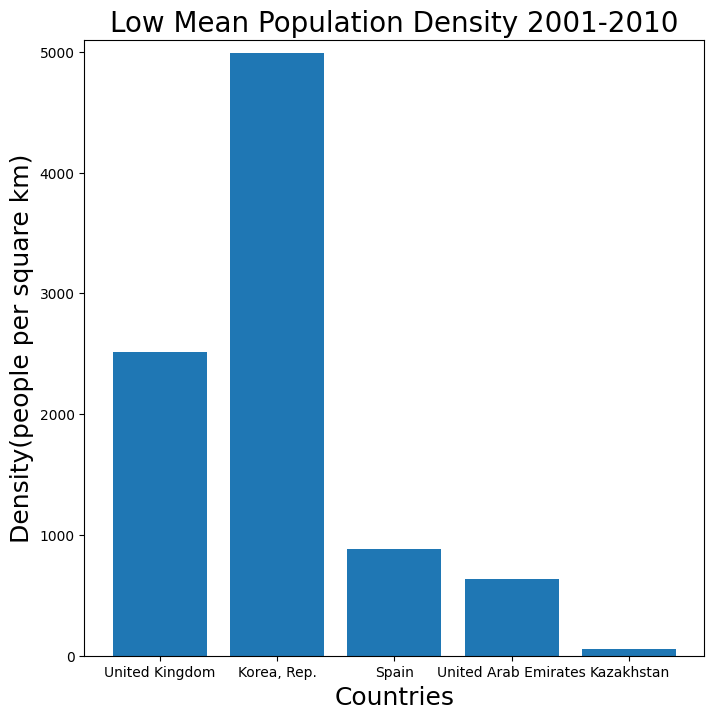

In [38]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1.Read the dataset from a CSV file into a pandas DataFrame
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/world_population.csv', index_col = 0)

data = data.transpose()
selected = ['Country Code', 'Indicator Name', 'Indicator Code']
data = data.drop(selected, axis = 0)


selected = ['United Kingdom', 'Korea, Rep.', 'Spain', 'United Arab Emirates', 'Kazakhstan']
years = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010']
data = data[selected].loc[years]
print(data)

plt.figure(figsize=(8, 8))
x_pos = np.arange(len(data.columns))
plt.bar(x_pos, data.sum(), align='center')
plt.xticks(x_pos, data.columns)
plt.ylim(ymax=5100)
plt.xlabel('Countries', fontsize = 18)
plt.ylabel('Density(people per square km)', fontsize=18)
plt.title(categories[i]+' Mean Population Density 2001-2010', fontsize = 20)
plt.show()